In [1]:
import numpy as np
import matplotlib.pyplot as plt
import psana
from Detector.PyDetector import PyDetector
import pandas
%matplotlib inline

In [2]:
ds = psana.DataSource('exp=cxic0415:run=25:idx')
run = ds.runs().next()
times = run.times()
totalEvents = len(times)
counter = 0
evt = run.event(times[counter])
env = ds.env()
src = psana.Source('DetInfo(CxiDs2.0:Cspad.0)')
det = PyDetector(src, env, pbits=0)

RuntimeError: IData::Exception: dataset directory is missing: /reg/d/psdm/CXI/cxic0415/xtc [in function files at IData/src/Dataset.cpp:306]

In [ ]:
spc_src        = psana.Source('BldInfo(FEE-SPEC0)')
spc = evt.get(psana.Bld.BldDataSpectrometerV1, spc_src)

In [ ]:
trace = np.copy(spc.hproj())
plt.plot(trace,'x')
plt.show()

In [ ]:
trace = trace - np.median(trace)
trace[trace < 0.0] = 0.0
ev_per_pixel = 18 # guess
np.aran
avg = np.average(trace) * ev_per_pixel
print avg

In [ ]:
print trace
plt.plot(trace,'x')
plt.show()

# Get time and fiducial from Cheetah hits

In [106]:
filename = '/reg/d/psdm/cxi/cxic0515/scratch/yoon82/cxij0315/cheetah/hdf5/r0014-lys/frames.txt'
with open(filename) as f:
    content = f.readlines()

In [107]:
totalHits = 0
hitList = []
for i in np.arange(1,len(content)):
    hit = int(content[i].split(',')[4])
    if hit == 1:
        hitList.append(i)
totalHits = len(hitList)
print "total hits: ", totalHits

myTable = [] # save 1) run number, 2) evt time, 3) fiducial, 4) photon energy
counter = 0
for i in hitList:
    name = content[i].split(',')[0]
    run = name.split('_')[3]
    runNum = run.split('r')
    runNum = int(runNum[1])
    time = name.split('_')[4]
    fiducial = name.split('_')[5]
    photonEnergy = float(content[i].split(',')[7])
    myTable.append((runNum,time,fiducial,photonEnergy))
    counter += 1
    
df = pandas.DataFrame(myTable)
print myTable[0][2]

total hits:  199
2112


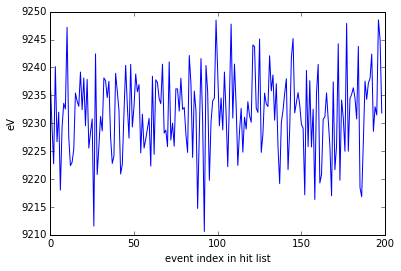

In [108]:
plt.plot(df[3])
plt.ylabel('eV')
plt.xlabel('event index in hit list')
plt.show()

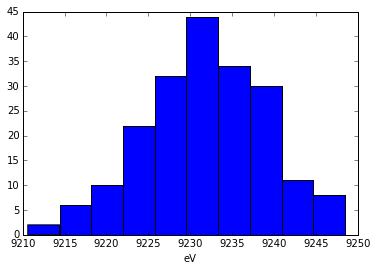

In [104]:
plt.hist(df[3])
plt.xlabel('eV')
plt.show()

In [105]:
# Find phton energy above 9240eV
result = df.sort_index(by=3,ascending=True)
print result[2:3]
print result[2:3][3]
print result

     0       1     2        3
88  14  083244  76ec  9214.73

[1 rows x 4 columns]
88    9214.73
Name: 3, dtype: float64
      0       1     2        3
92   14  083245  78b7  9210.60
26   14  083151  2d78  9211.56
88   14  083244  76ec  9214.73
158  14  083305  9534  9216.33
186  14  083315  a269  9216.82
168  14  083308  9981  9217.00
152  14  083304  92e5  9217.17
6    14  083144  2280  9218.01
185  14  083313  a038  9218.44
137  14  083300  8e14  9219.18
161  14  083307  975f  9219.28
95   14  083247  7bcc  9219.77
173  14  083310  9b2b  9219.78
162  14  083307  9759  9220.79
28   14  083152  2ed1  9220.82
42   14  083159  3861  9220.90
170  14  083309  9ab3  9221.66
142  14  083302  90c6  9221.69
106  14  083251  8178  9222.21
60   14  083230  6342  9222.31
12   14  083147  2679  9222.40
112  14  083253  838e  9222.44
43   14  083200  39e1  9222.59
2    14  083143  21cc  9222.72
37   14  083158  3630  9222.79
13   14  083147  26d6  9223.00
85   14  083242  74ca  9223.88
38   14  083